# Potencial Elétrico devido a duas cargas eléricas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Definição da função potencial

$$V(r) = \frac{1}{{4\pi {\varepsilon _0}}}\frac{q}{r} \approx 9 \times {10^9}\frac{q}{r}$$

$$V(x,y)  \approx 9 \times {10^9}\frac{q}{\sqrt{x^2+y^2}}$$

Especial cuidado será tomado para não dividirmos pelo raio zero. Por este motivo que é solicitado o raio (tamanho) da carga.

In [ ]:
def potencial(q, rq, x0, y0, X, Y):
    raio = np.sqrt( (X-x0)**2 + (Y-y0)**2 )
    raio[raio<=rq] = rq #calcula apenas fora da carga
    V = 9e9 * q / raio 
    return V

### Definição de quiver com escala logarítmica

É necessário quando a diferença entre os menores vetores e os maiores é muito grande.

In [ ]:
def quiverLog(Ex,Ey):
    mag = np.sqrt(Ex**2 + Ey**2)
    ExNorm = Ex / mag
    EyNorm = Ey / mag

    log_Ex = np.log(mag/np.min(mag))  * ExNorm;
    log_Ey = np.log(mag/np.min(mag))  * EyNorm;

    return [log_Ex, log_Ey]

### Domínio de cálculo 

Aqui definiremos o espaço $[x \times y]$ que calcularemos os potenciais e os campos elétricos.

$[x \times y]$ correspondem às variáves `limX` e `limY`.

In [ ]:
nrpts = 5000
limY = 10
limX = 20
x = np.linspace(-limX,limX,nrpts)
y = np.linspace(-limY,limY,nrpts)
XX,YY = np.meshgrid(x,y, indexing = 'ij')

para que a função gradiente utilizada a posteriori funcione, é imprecindível, o uso dos termos a adicionais, na função `meshgrid`, `'indexing = 'ij'`.

## Função Potencial

A função `potencial(q, rq, x0, y0, X, Y)`, definida acima, recebe a carga $q$, o raio (tamanho) da carga $r_q$, o ponto de localização da carga $(x,y)$, e os pontos do domínio de cálculo $[x\times y]$ onde deseja-se saber o potencial elétrico $V$.

## Potencial da carga $q_1$

In [ ]:
x0 = -10
y0 = 0
rq1 = 2
q1 = 10e-9
V1 = potencial(q1, rq1, x0,y0, XX,YY)

## Potencial da carga $q_2$

In [ ]:
x0 = 10
y0 = 0
rq2 = 2
q2 = -q1
V2 = potencial(q2, rq2, x0,y0, XX,YY)

## Potencial Resultante

É a soma dos potenciais individuais $V_1$ e $V_2$

$$V_{res} = V_1 + V_2 $$

In [ ]:
Vres = V1 + V2
maxV = np.max(Vres)

### Campo Elétrico a partir do potencial

Sabe-se da teoria clássica do eletromagnetismo que em $2D$, o campo elétrico é dado por:

$$\vec E = \left[ {\begin{array}{*{20}{c}}{{E_x}}\\{{E_y}}\end{array}} \right] =  - {\mathop{\rm grad}\nolimits} \left( V \right) =  - \left[ {\begin{array}{*{20}{c}}{\frac{\partial }{{\partial x}}V}\\{\frac{\partial }{{\partial x}}V}\end{array}} \right] =  - \frac{\partial }{{\partial x}}V\,\widehat {\bf{i}}\,\, - \,\,\frac{\partial }{{\partial x}}V\,\widehat {\bf{j}}$$


In [ ]:

Ex,Ey = np.gradient(Vres)
Ex = - Ex
Ey = - Ey
log_Ex, log_Ey = quiverLog(Ex,Ey)
mag = np.sqrt(Ex**2+Ey**2)
log_mag = np.sqrt(log_Ex**2+log_Ey**2)

## Gráficos dos potenciais e campos elétricos

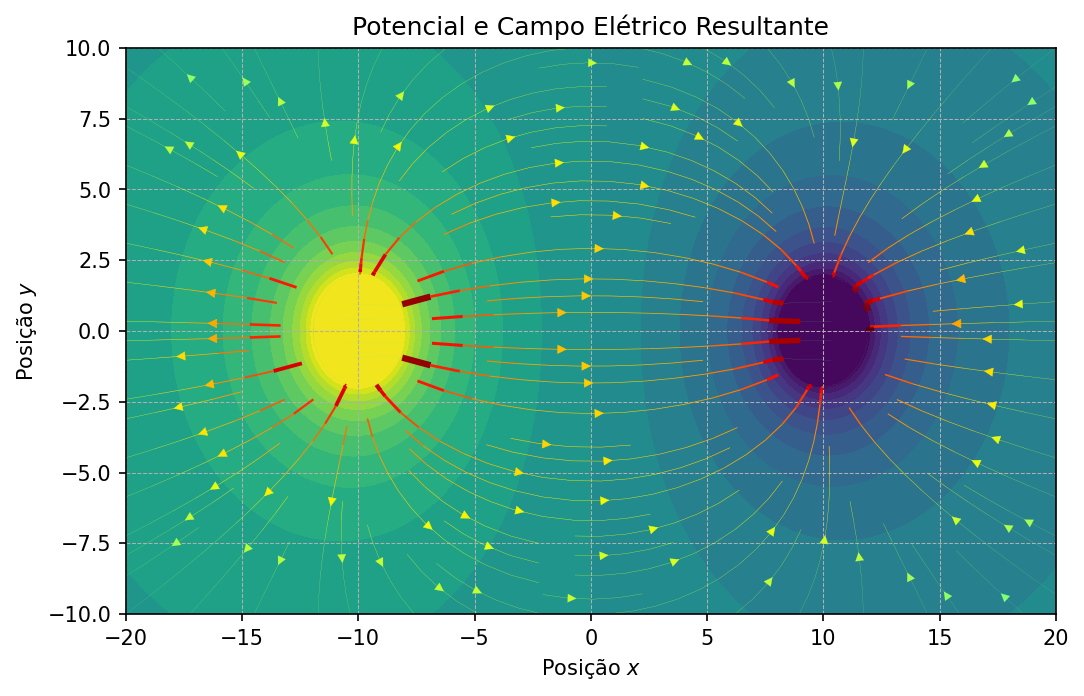

In [ ]:
plt.figure(figsize=(8,5), dpi = 150)

plt.grid(lw=0.5,ls='--')
plt.title('Potencial e Campo Elétrico Resultante')
plt.xlabel('Posição $x$')
plt.ylabel('Posição $y$')

plt.streamplot(XX.transpose(), YY.transpose(),log_Ex.transpose(),log_Ey.transpose(), density = 1, color=log_mag.transpose(), cmap=plt.cm.jet, linewidth=20*mag.transpose())
plt.contourf(XX,YY,Vres,levels=21)
plt.show()


In [ ]:
XX

array([[-20.       , -20.       , -20.       , ..., -20.       ,
        -20.       , -20.       ],
       [-19.9919984, -19.9919984, -19.9919984, ..., -19.9919984,
        -19.9919984, -19.9919984],
       [-19.9839968, -19.9839968, -19.9839968, ..., -19.9839968,
        -19.9839968, -19.9839968],
       ...,
       [ 19.9839968,  19.9839968,  19.9839968, ...,  19.9839968,
         19.9839968,  19.9839968],
       [ 19.9919984,  19.9919984,  19.9919984, ...,  19.9919984,
         19.9919984,  19.9919984],
       [ 20.       ,  20.       ,  20.       , ...,  20.       ,
         20.       ,  20.       ]])